In [1]:
import pandas as pd
df = pd.read_csv("/Users/tony/project_506/temperature_production.csv")
import numpy as np
df = df.replace(-9999,np.nan)
df = df.dropna()
df['lastyear']=np.nan
print(df)

     state       county      station  year     jan     feb     mar     apr  \
0       AL      Baldwin  USC00010583  1990  1259.0  1504.0  1677.0  1877.0   
1       AL      Baldwin  USC00010583  1991  1083.0  1353.0  1655.0  2087.0   
2       AL      Baldwin  USC00010583  1992   938.0  1323.0  1523.0  1833.0   
3       AL      Baldwin  USC00010583  1993  1200.0  1100.0  1374.0  1688.0   
4       AL      Baldwin  USC00010583  1994   812.0  1351.0  1601.0  2024.0   
5       AL      Baldwin  USC00010583  1995  1075.0  1229.0  1609.0  1941.0   
6       AL      Baldwin  USC00010583  1996  1036.0  1207.0  1332.0  1795.0   
7       AL      Baldwin  USC00010583  1997  1041.0  1290.0  1895.0  1762.0   
8       AL      Baldwin  USC00010583  1998  1155.0  1170.0  1399.0  1842.0   
9       AL      Baldwin  USC00010583  1999  1276.0  1420.0  1481.0  2190.0   
10      AL      Baldwin  USC00010583  2000  1227.0  1457.0  1795.0  1844.0   
11      AL      Baldwin  USC00010583  2001   821.0  1450.0  1420

In [7]:
for i in range(df.shape[0]):
    if i==0:
        continue
    if df.iloc[i-1,0]==df.iloc[i,0] and df.iloc[i-1,1] == df.iloc[i,1] and df.iloc[i-1,3]==df.iloc[i,3]-1:
        df.iloc[i,-1]= df.iloc[i-1,18]
#     break
print(df)

     state       county      station  year     jan     feb     mar     apr  \
0       AL      Baldwin  USC00010583  1990  1259.0  1504.0  1677.0  1877.0   
1       AL      Baldwin  USC00010583  1991  1083.0  1353.0  1655.0  2087.0   
2       AL      Baldwin  USC00010583  1992   938.0  1323.0  1523.0  1833.0   
3       AL      Baldwin  USC00010583  1993  1200.0  1100.0  1374.0  1688.0   
4       AL      Baldwin  USC00010583  1994   812.0  1351.0  1601.0  2024.0   
5       AL      Baldwin  USC00010583  1995  1075.0  1229.0  1609.0  1941.0   
6       AL      Baldwin  USC00010583  1996  1036.0  1207.0  1332.0  1795.0   
7       AL      Baldwin  USC00010583  1997  1041.0  1290.0  1895.0  1762.0   
8       AL      Baldwin  USC00010583  1998  1155.0  1170.0  1399.0  1842.0   
9       AL      Baldwin  USC00010583  1999  1276.0  1420.0  1481.0  2190.0   
10      AL      Baldwin  USC00010583  2000  1227.0  1457.0  1795.0  1844.0   
11      AL      Baldwin  USC00010583  2001   821.0  1450.0  1420

In [10]:
df = df.dropna()
# df = df.drop('station', axis=1)
# df = df.drop('state', axis=1)
# df = df.drop('county', axis=1)
print(df)

      year     jan     feb     mar     apr     may     jun     jul     aug  \
1     1991  1083.0  1353.0  1655.0  2087.0  2430.0  2596.0  2683.0  2648.0   
2     1992   938.0  1323.0  1523.0  1833.0  2189.0  2530.0  2720.0  2550.0   
3     1993  1200.0  1100.0  1374.0  1688.0  2213.0  2634.0  2781.0  2757.0   
4     1994   812.0  1351.0  1601.0  2024.0  2251.0  2606.0  2606.0  2624.0   
5     1995  1075.0  1229.0  1609.0  1941.0  2386.0  2528.0  2755.0  2787.0   
6     1996  1036.0  1207.0  1332.0  1795.0  2390.0  2581.0  2758.0  2650.0   
7     1997  1041.0  1290.0  1895.0  1762.0  2219.0  2499.0  2706.0  2708.0   
8     1998  1155.0  1170.0  1399.0  1842.0  2403.0  2796.0  2841.0  2790.0   
9     1999  1276.0  1420.0  1481.0  2190.0  2292.0  2597.0  2713.0  2864.0   
10    2000  1227.0  1457.0  1795.0  1844.0  2493.0  2637.0  2891.0  2828.0   
11    2001   821.0  1450.0  1420.0  2002.0  2349.0  2596.0  2700.0  2637.0   
12    2002  1117.0  1072.0  1543.0  2088.0  2357.0  2633.0  2717

0.584640046025


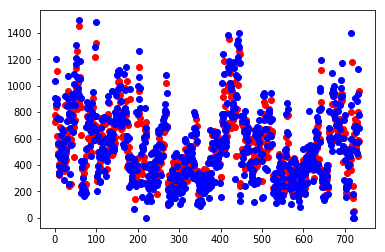

In [17]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

df1 = df.iloc[:7000,1:13].join(df.iloc[:7000,-1]).values
# print(df1)
df2 = df.iloc[:7000,15].values
# print(df2)
df3 = df.iloc[7000:,1:13].join(df.iloc[7000:,-1]).values
df4 = df.iloc[7000:,15].values
regressor = MLPRegressor()
# print(df1.shape)
regressor.fit(df1,df2)
prediction = regressor.predict(df3)
print(regressor.score(df3,df4))

plt.plot(range(len(df4)), prediction, 'ro')
plt.plot(range(len(df4)), df4, 'bo')
plt.show()

0.554391141749


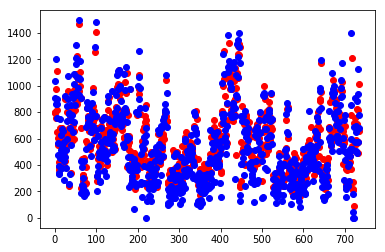

In [14]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

df1 = df.iloc[:7000,2:10].join(df.iloc[:7000,-1]).values
# print(df1)
df2 = df.iloc[:7000,15].values
# print(df2)
df3 = df.iloc[7000:,2:10].join(df.iloc[7000:,-1]).values
df4 = df.iloc[7000:,15].values
regressor = MLPRegressor()
# print(df1.shape)
regressor.fit(df1,df2)
prediction = regressor.predict(df3)
print(regressor.score(df3,df4))

plt.plot(range(len(df4)), prediction, 'ro')
plt.plot(range(len(df4)), df4, 'bo')
plt.show()

0.62199236117


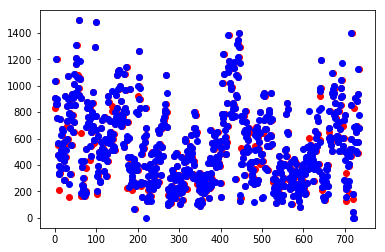

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

df1 = df.iloc[:7000,1:13].join(df.iloc[:7000,-1]).values
# print(df1)
df2 = df.iloc[:7000,15].values
# print(df2)
df3 = df.iloc[7000:,1:13].join(df.iloc[7000:,-1]).values
df4 = df.iloc[7000:,15].values
# regressor = MLPRegressor()
# # print(df1.shape)
# regressor.fit(df1,df2)
# prediction = regressor.predict(df3)
# print(regressor.score(df3,df4))
feature = PolynomialFeatures(degree=2)
train = feature.fit_transform(df1)
test = feature.transform(df3)
regress = LinearRegression().fit(train,df2)
score = regress.score(test,df4)
print(score)
plt.plot(range(len(df4)),df3[:,-1],'ro')
# plt.plot(range(len(df4)), prediction, 'ro')
plt.plot(range(len(df4)), df4, 'bo')
plt.show()

In [25]:
last = df3[:,-1]
print(1-((df4 - last) ** 2).sum()/ ((df4 - df4.mean()) ** 2).sum())

0.495212068053
